# **TASK-1:DATA PROCESSING**
# we load the data and preprocess it for further analysis.


# STEP-1 Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
dataframe=pd.read_csv('/content/POWER GENERATION DS.csv')

In [ ]:
dataframe.head(5)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,9/1/2017,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,9/1/2017,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,9/1/2017,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,9/1/2017,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,9/1/2017,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


# STEP-2 Understanding the Data


In [ ]:
dataframe.shape

(345273, 11)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Dates                             345273 non-null  object 
 1   Power Station                     345273 non-null  object 
 2   Monitored Cap.(MW)                345273 non-null  float64
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64
 4   Planned Maintanence (MW)          345273 non-null  float64
 5   Forced Maintanence(MW)            345273 non-null  float64
 6   Other Reasons (MW)                345273 non-null  int64  
 7   Programme or Expected(MU)         345273 non-null  int64  
 8   Actual(MU)                        345273 non-null  int64  
 9   Excess(+) / Shortfall (-)         345273 non-null  float64
 10  Deviation                         345273 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.

In [ ]:
dataframe.describe()

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
count,345273.000000,345273.000000,345273.000000,345273.000000,345273.000000,345273.000000,345273.000000,345273.000000,345273.000000
mean,1577.734493,474.523131,65.213392,307.177523,22.012005,16.551630,19.246217,-0.615647,0.296424
std,2619.897504,840.791542,204.164108,656.641688,150.334633,34.852273,38.306851,9.717728,35.290388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-147.330000,-100.000000
25%,208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.590000,0.000000
50%,600.000000,135.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000
75%,1458.000000,600.000000,0.000000,300.000000,0.000000,16.000000,20.000000,1.230000,0.000000
max,19813.590000,9685.490000,3020.000000,9193.590000,4620.000000,304.000000,466.000000,177.240000,6000.000000


In [ ]:
dataframe.columns

Index(['Dates', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)',
       'Programme or Expected(MU)', 'Actual(MU)', 'Excess(+) / Shortfall (-)',
       'Deviation'],
      dtype='object')

In [ ]:
dataframe.isnull().sum()

,0
Dates,0
Power Station,0
Monitored Cap.(MW),0
Total Cap. Under Maintenace (MW),0
Planned Maintanence (MW),0
Forced Maintanence(MW),0
Other Reasons (MW),0
Programme or Expected(MU),0
Actual(MU),0
Excess(+) / Shortfall (-),0


In [ ]:
dataframe.nunique(axis=1)

,0
0,8
1,8
2,9
3,8
4,10
...,...
345268,7
345269,9
345270,6
345271,7


In [ ]:
# Check for non-zero values in 'other reasons' and 'deviation' columns
non_zero_other_reasons = (dataframe['Other Reasons (MW)'] != 0).any()
non_zero_deviation = (dataframe['Deviation'] != 0).any()

print(non_zero_other_reasons)
print(non_zero_deviation)

True
True


# STEP-3:Feature Engineering

# Removing the unecessary columns in the dataframe

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
colrmvd = ['Dates', 'Power Station']

In [ ]:
colsrmd_df = dataframe.drop(columns=colrmvd)

In [ ]:
colsrmd_df

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...
345268,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


# Normalization of the data

In [ ]:
# Convert the 'date' column to datetime format
dataframe['Dates'] = pd.to_datetime(dataframe['Dates'])

# Extract the month and year from the 'date' column
dataframe['month'] = dataframe['Dates'].dt.month
dataframe['year'] = dataframe['Dates'].dt.year

print(dataframe[['month', 'year','Dates']])

        month  year      Dates
0           9  2017 2017-09-01
1           9  2017 2017-09-01
2           9  2017 2017-09-01
3           9  2017 2017-09-01
4           9  2017 2017-09-01
...       ...   ...        ...
345268      4  2022 2022-04-13
345269      4  2022 2022-04-13
345270      4  2022 2022-04-13
345271      4  2022 2022-04-13
345272      4  2022 2022-04-13

[345273 rows x 3 columns]


# Creating a final dataframe with normalized data

In [ ]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(colsrmd_df), columns=colsrmd_df.columns)

In [ ]:
# Extract the 'month', 'year', and 'power stations' columns from 'df'
date_power_columns = dataframe[['month', 'year','Dates','Power Station']]

# Reset index of both DataFrames to align them
norm_df.reset_index(drop=True, inplace=True)
date_power_columns.reset_index(drop=True, inplace=True)

final_df = pd.concat([norm_df, date_power_columns], axis=1)

print(final_df)

        Monitored Cap.(MW)  Total Cap. Under Maintenace (MW)  \
0                 0.112822                          0.013938   
1                 0.137280                          0.255021   
2                 0.170489                          0.039131   
3                 0.064854                          0.015487   
4                 0.193115                          0.278525   
...                    ...                               ...   
345268            0.006914                          0.003304   
345269            0.102304                          0.099479   
345270            0.005299                          0.003614   
345271            0.037853                          0.025812   
345272            0.036672                          0.000000   

        Planned Maintanence (MW)  Forced Maintanence(MW)  Other Reasons (MW)  \
0                       0.000000                0.014684            0.000000   
1                       0.000000                0.268665            0.0

# **TASK-2:EXPLORATORY DATA ANALYSIS**
## In this we plot bar charts, scatter plots etc to identify their relationships between the features.

## 20 stations that give the highest monitored capacity.

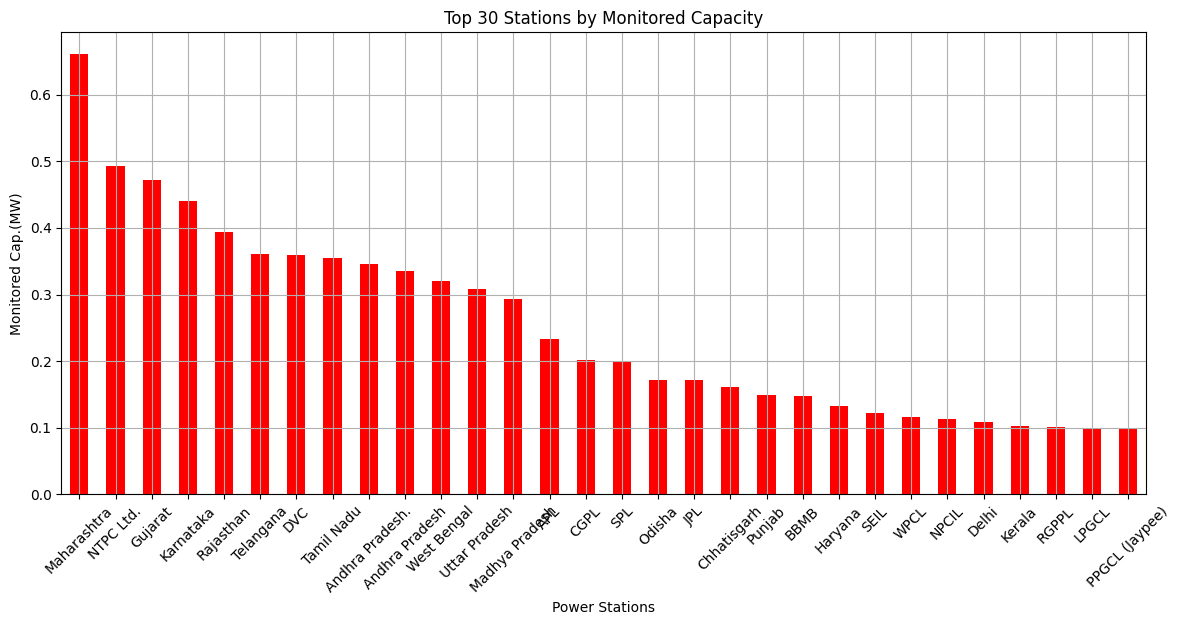

In [ ]:
top_stations = final_df.groupby('Power Station')['Monitored Cap.(MW)'].mean().nlargest(30)

plt.figure(figsize=(14, 6))
top_stations.plot(kind='bar', color='red')
plt.xlabel('Power Stations')
plt.ylabel('Monitored Cap.(MW)')
plt.title('Top 30 Stations by Monitored Capacity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 20 stations that give the least monitored capacity.

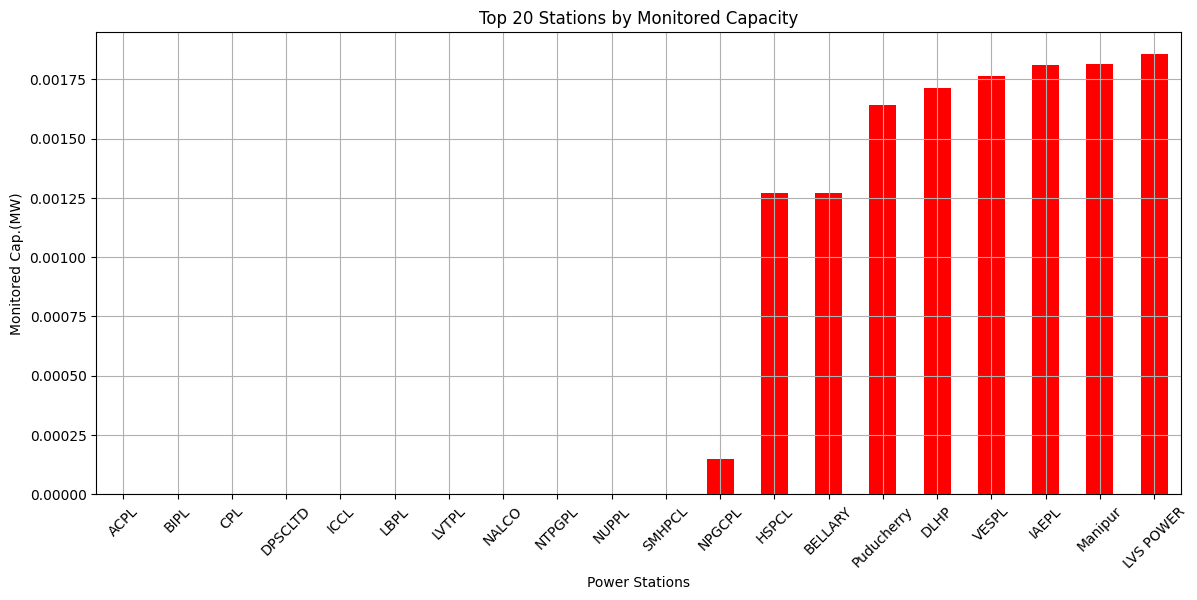

In [ ]:
least_stations = final_df.groupby('Power Station')['Monitored Cap.(MW)'].mean().nsmallest(20)

plt.figure(figsize=(14, 6))
least_stations.plot(kind='bar', color='red')
plt.xlabel('Power Stations')
plt.ylabel('Monitored Cap.(MW)')
plt.title('Top 20 Stations by Monitored Capacity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Expected vs Actual Power Generation Across 5 Years

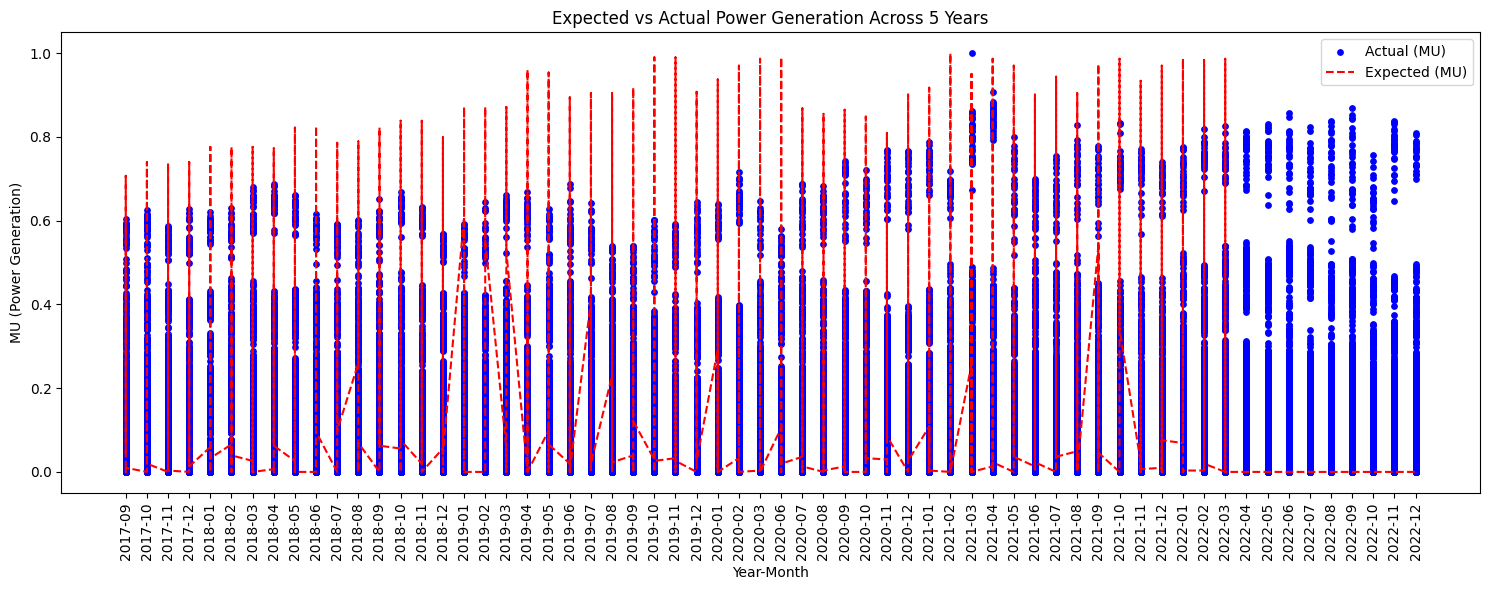

In [ ]:
# Creating a 'Year-Month' column to represent all months over multiple years and sort them
final_df['Year-Month'] = final_df['year'].astype(str) + '-' + final_df['month'].astype(str).str.zfill(2)
final_df = final_df.sort_values(by='Year-Month')

plt.figure(figsize=(15, 6))
plt.scatter(final_df['Year-Month'], final_df['Actual(MU)'], color='blue', label='Actual (MU)', s=15)
plt.plot(final_df['Year-Month'], final_df['Programme or Expected(MU)'], color='red', linestyle='--', label='Expected (MU)')

# Formatting the plot
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('MU (Power Generation)')
plt.title('Expected vs Actual Power Generation Across 5 Years')
plt.legend()
plt.tight_layout()
plt.show()

# Planned vs Forced Maintenance Across 5 Years

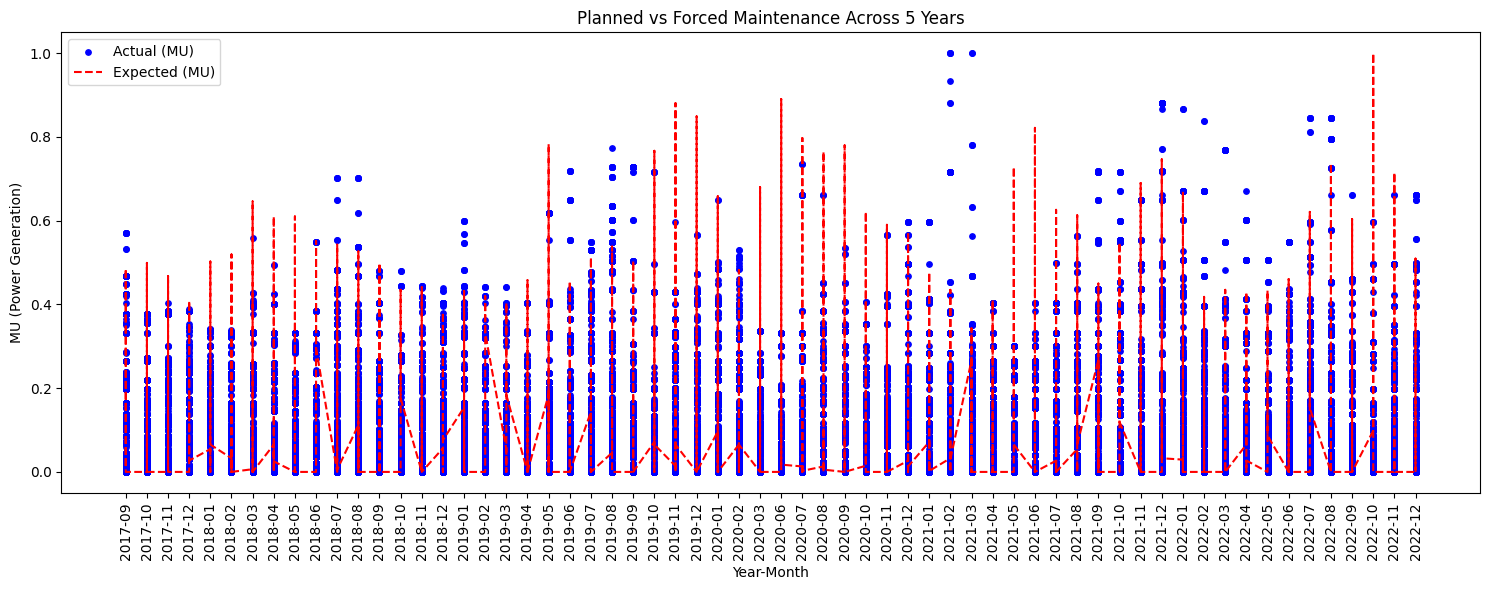

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(final_df['Year-Month'], final_df['Planned Maintanence (MW)'], color='blue', label='Actual (MU)', s=15)
plt.plot(final_df['Year-Month'], final_df['Forced Maintanence(MW)'], color='red', linestyle='--', label='Expected (MU)')

# Formatting the plot
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('MU (Power Generation)')
plt.title('Planned vs Forced Maintenance Across 5 Years')
plt.legend()
plt.tight_layout()
plt.show()

# Average Actual Power Generation from 2017 to 2022

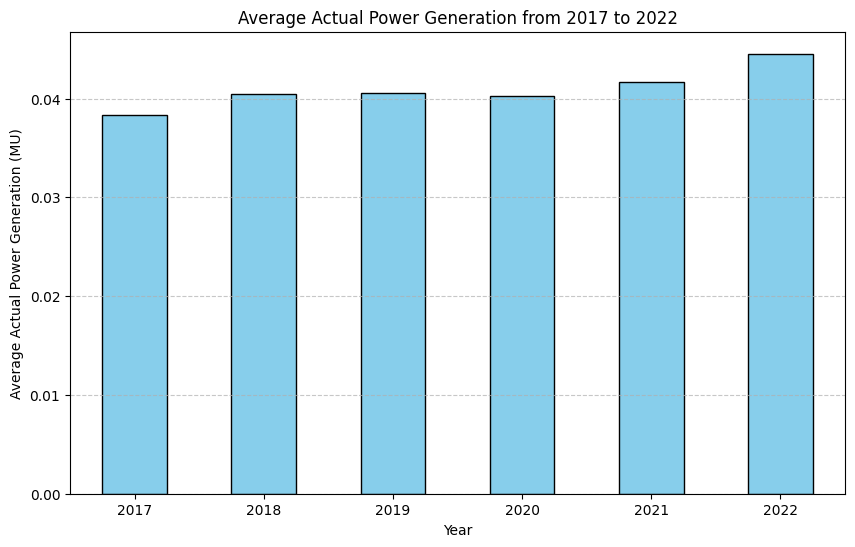

In [ ]:
# Group data by year and calculate the mean Actual (MU) for each year
average_actual_mu = final_df.groupby('year')['Actual(MU)'].mean()

plt.figure(figsize=(10, 6))
average_actual_mu.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average Actual Power Generation (MU)')
plt.title('Average Actual Power Generation from 2017 to 2022')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Average Actual vs Expected MU (2017-2022)

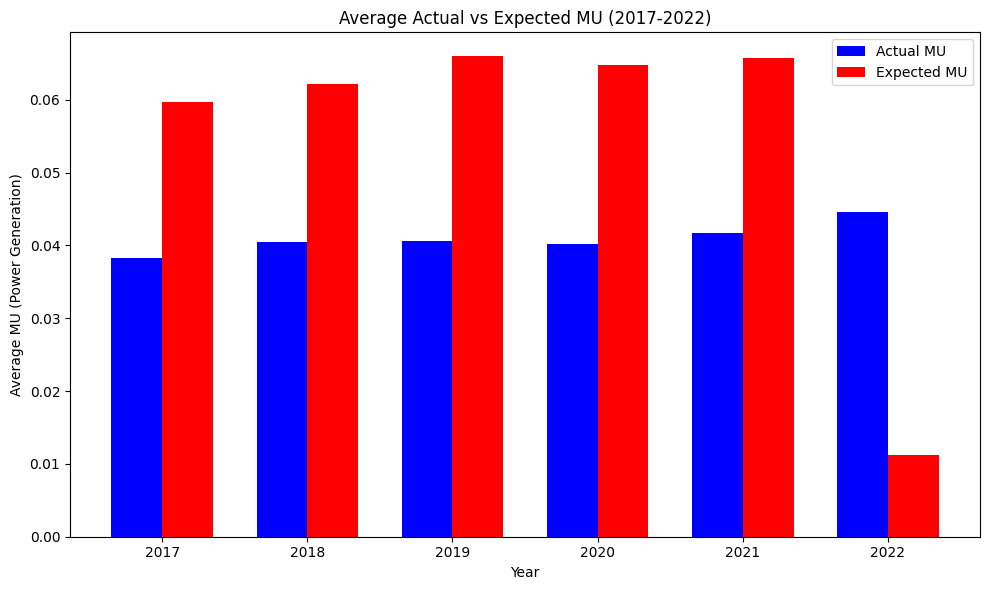

In [ ]:
# Group by year and calculate the average for Actual and Expected MU
yearly_avg = final_df.groupby('year')[['Actual(MU)', 'Programme or Expected(MU)']].mean().reset_index()

# Plotting the grouped bar plot
bar_width = 0.35
years = yearly_avg['year']
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Actual and Expected MU
ax.bar(x - bar_width / 2, yearly_avg['Actual(MU)'], bar_width, label='Actual MU', color='blue')
ax.bar(x + bar_width / 2, yearly_avg['Programme or Expected(MU)'], bar_width, label='Expected MU', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Average MU (Power Generation)')
ax.set_title('Average Actual vs Expected MU (2017-2022)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.tight_layout()
plt.show()

# Average Maintenance from 2017 to 2022 for Power Stations

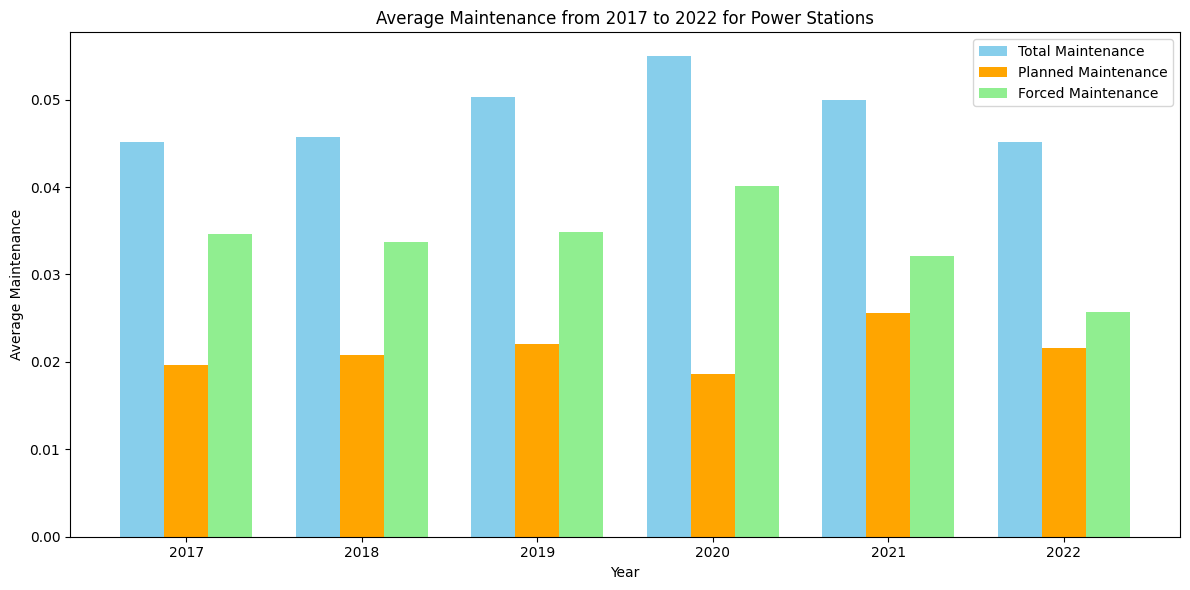

In [ ]:
grouped_data = final_df.groupby(['year']).agg({
    'Total Cap. Under Maintenace (MW)': 'mean',
    'Planned Maintanence (MW)': 'mean',
    'Forced Maintanence(MW)': 'mean'
}).reset_index()

# Set the positions and width for the bars
x = np.arange(len(grouped_data['year']))
width = 0.25

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, grouped_data['Total Cap. Under Maintenace (MW)'], width, label='Total Maintenance', color='skyblue')
bars2 = plt.bar(x, grouped_data['Planned Maintanence (MW)'], width, label='Planned Maintenance', color='orange')
bars3 = plt.bar(x + width, grouped_data['Forced Maintanence(MW)'], width, label='Forced Maintenance', color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Average Maintenance')
plt.title('Average Maintenance from 2017 to 2022 for Power Stations')
plt.xticks(x, grouped_data['year'])
plt.legend()
plt.tight_layout()
plt.show()

# Heat map between the selected features

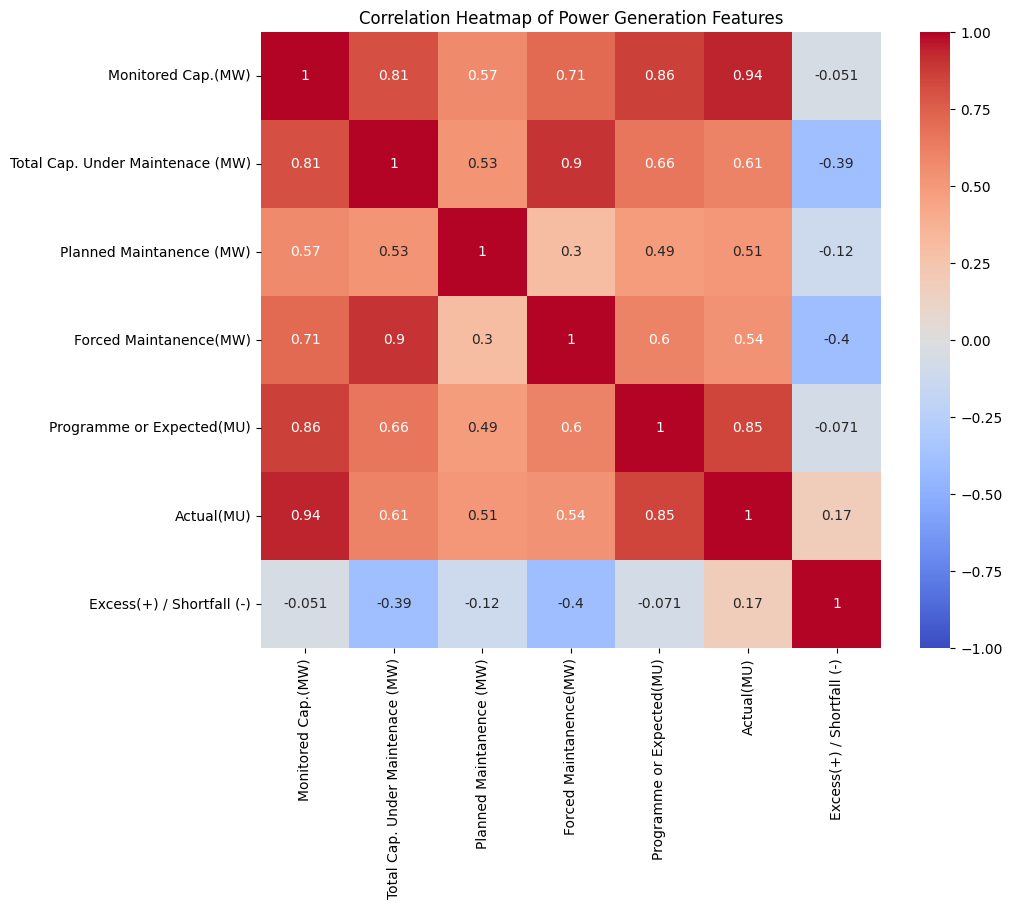

In [ ]:
# Select relevant numerical features
corr_matrix = final_df[['Monitored Cap.(MW)',
                        'Total Cap. Under Maintenace (MW)',
                        'Planned Maintanence (MW)',
                        'Forced Maintanence(MW)',
                        'Programme or Expected(MU)',
                        'Actual(MU)',
                        'Excess(+) / Shortfall (-)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Power Generation Features')
plt.show()


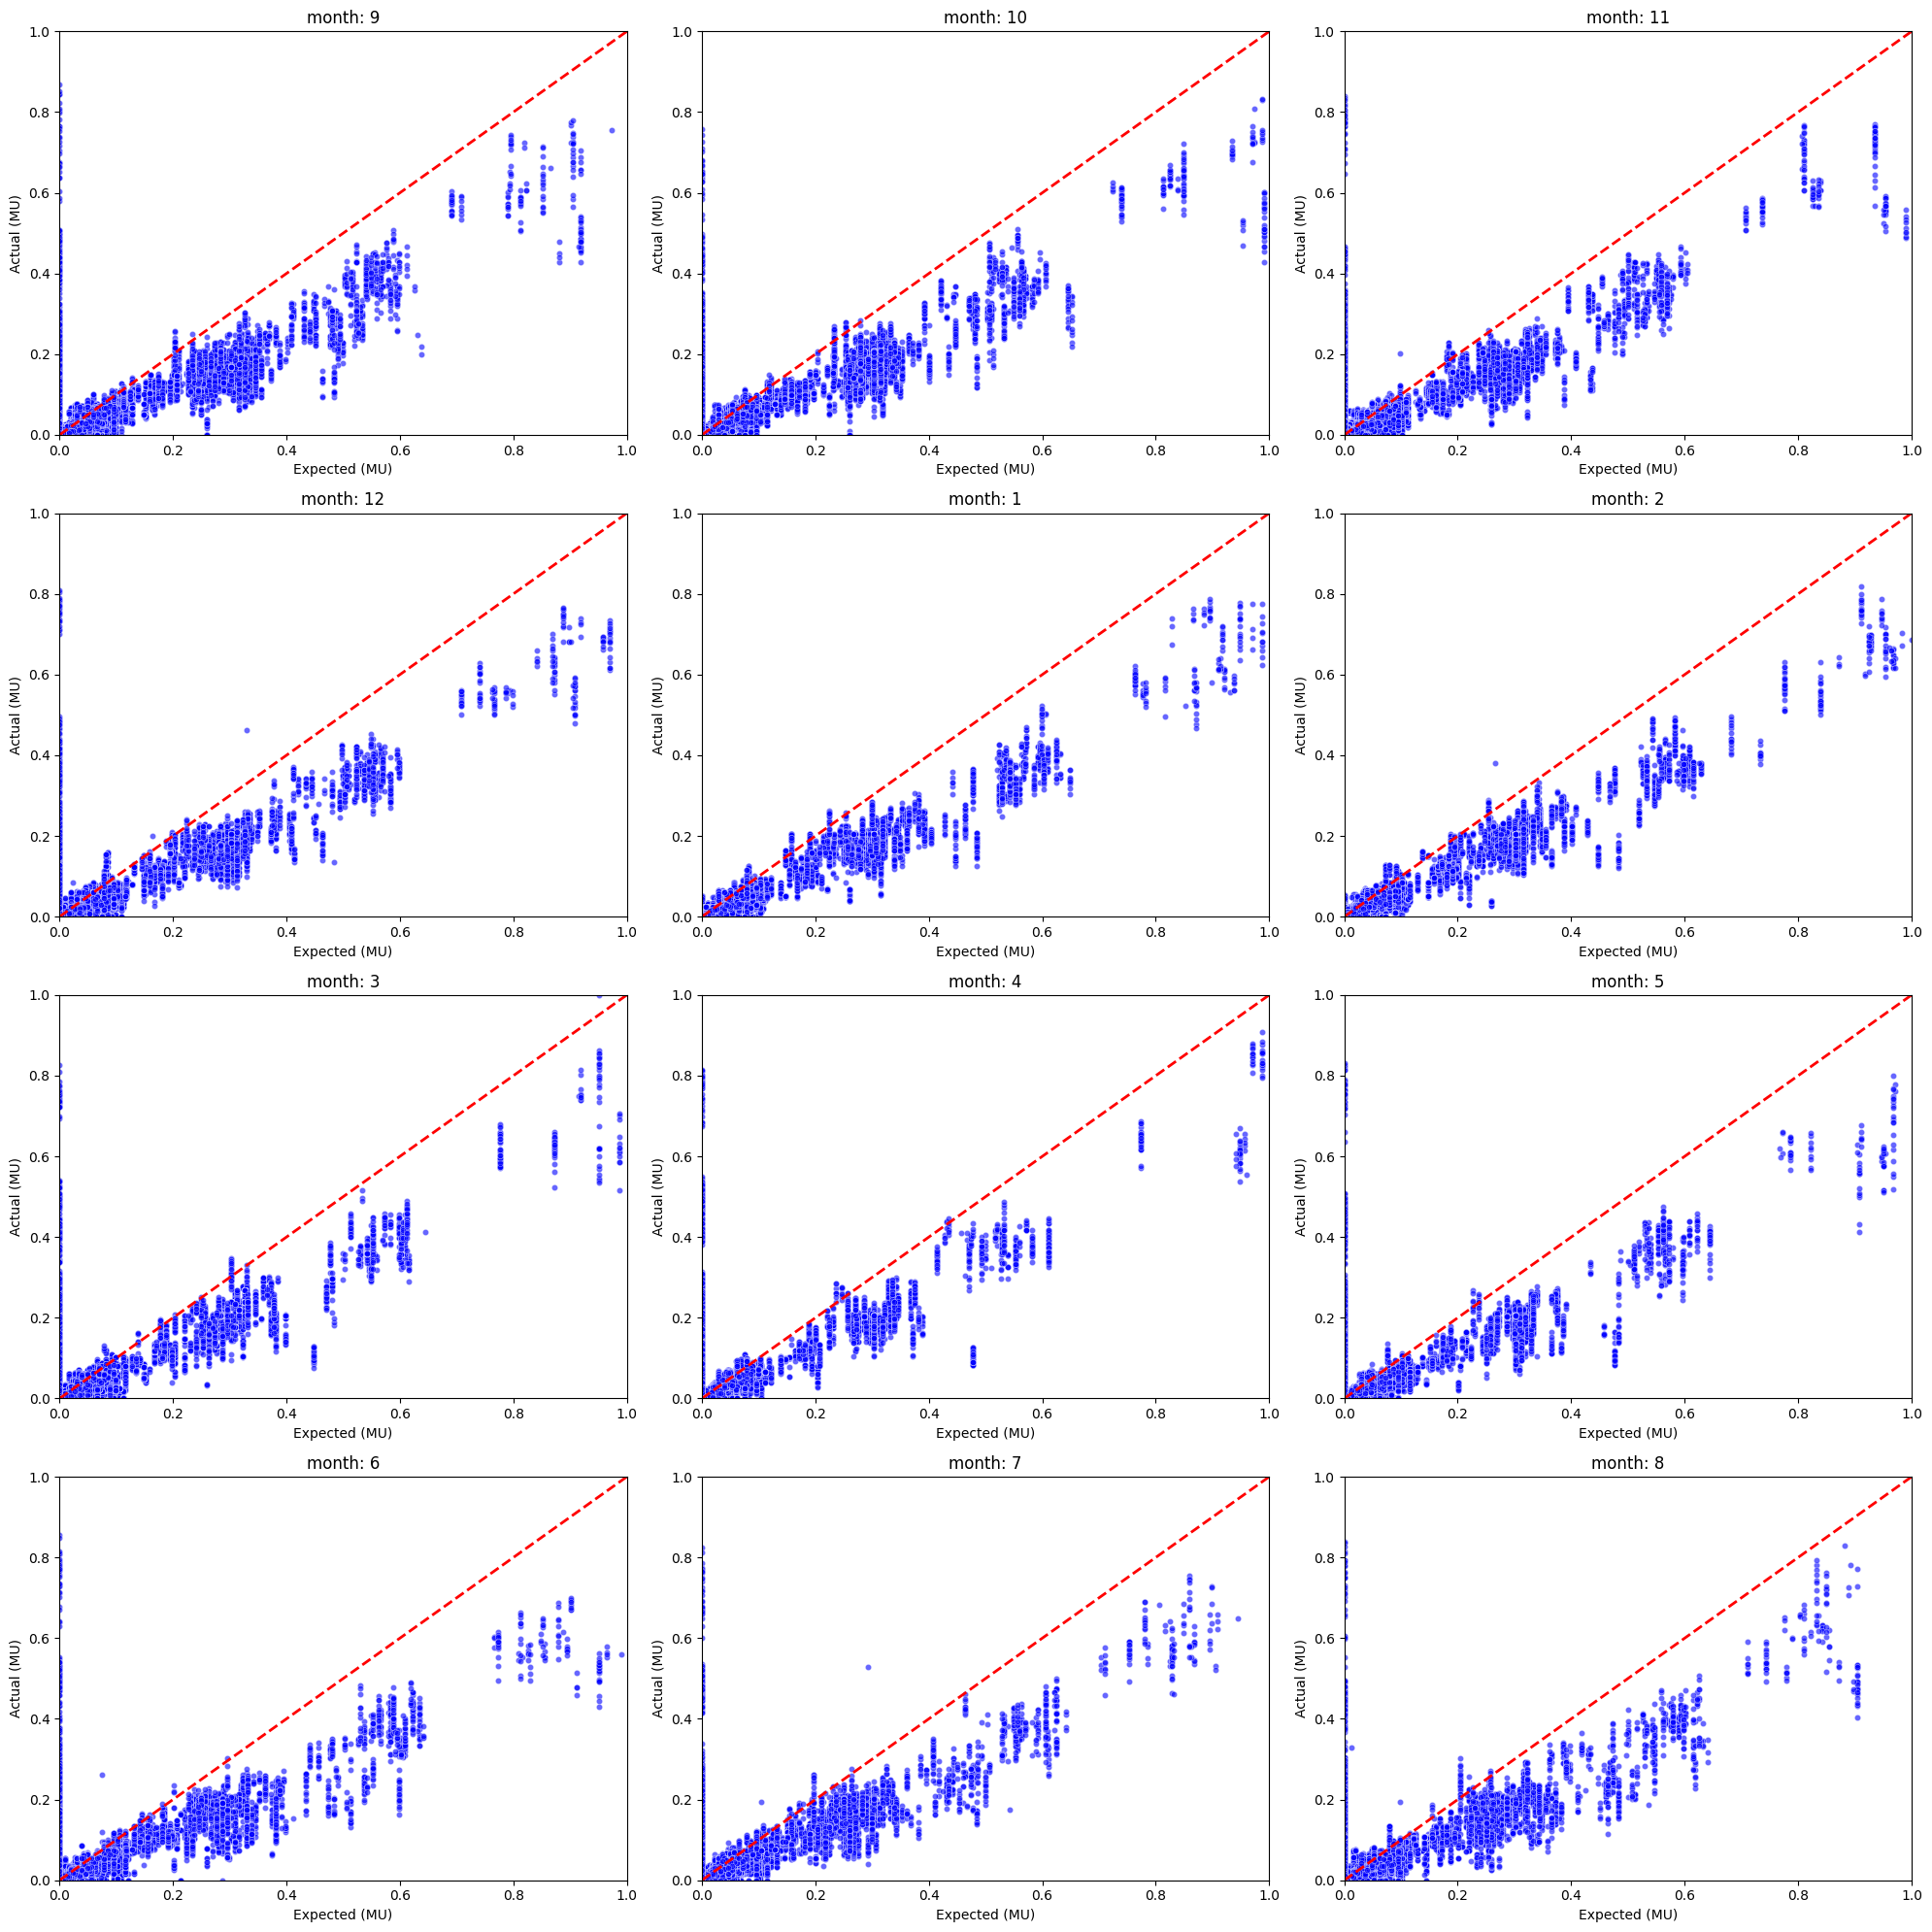

In [ ]:
# Assuming 'final_df' contains normalized values and separate 'Month' column
months = final_df['month'].unique()  # Get unique months

# Plotting scatter plots for each month
plt.figure(figsize=(20, 20))  # Adjust figure size

for i, month in enumerate(months, 1):
    plt.subplot(4, 3, i)  # Create 4x3 grid for 12 months
    month_data = final_df[final_df['month'] == month]

    sns.scatterplot(
        x='Programme or Expected(MU)',
        y='Actual(MU)',
        data=month_data,
        color='blue',
        alpha=0.6,
        s=20
    )

    # Plot reference line y = x
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)

    plt.title(f'month: {month}')
    plt.xlabel('Expected (MU)')
    plt.ylabel('Actual (MU)')
    plt.xlim(0, 1)  # Adjust limits based on your data
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


# **TASK-3:MODEL DEVELOPEMENT**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Function to create input-output sequences
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Feature Engineering: Adding Lag Features and Rolling Averages
final_df['Actual_MU_lag1'] = final_df['Actual(MU)'].shift(1)
final_df['Actual_MU_rolling_mean'] = final_df['Actual(MU)'].rolling(window=7).mean()
final_df = final_df.dropna()  # Drop NA values generated by shifting

In [ ]:
# Select relevant columns for modeling
features = final_df[['Monitored Cap.(MW)', 'Planned Maintanence (MW)',
            'Forced Maintanence(MW)', 'Other Reasons (MW)',
            'Excess(+) / Shortfall (-)', 'Deviation']]
target = final_df['Actual(MU)']
# Scale the features and target between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

In [ ]:
# Create input-output sequences
X, y = create_sequences(features_scaled, target_scaled, time_steps=60)

# Train-Test Split (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Check shape of input (samples, timesteps, features)
print(X_train.shape)  # (samples, 30, 6)
print(y_train.shape)  # (samples, 1)

(276165, 60, 6)
(276165, 1)


In [ ]:
print(X_test.shape)  # (samples, 30, 6)
print(y_test.shape)  # (samples, 1)

(69042, 60, 6)
(69042, 1)


In [ ]:
# Model Building
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Define the model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),  # Dropout layer to prevent overfitting

    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),

    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Try increasing the batch size
history=model.fit(X_train, y_train, epochs=80, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 136s 76ms/step - loss: 0.0063 - mae: 0.0466 - val_loss: 0.0072 - val_mae: 0.0467
Epoch 2/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - loss: 0.0063 - mae: 0.0468 - val_loss: 0.0071 - val_mae: 0.0476
Epoch 3/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - loss: 0.0061 - mae: 0.0462 - val_loss: 0.0071 - val_mae: 0.0473
Epoch 4/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 133s 76ms/step - loss: 0.0063 - mae: 0.0465 - val_loss: 0.0071 - val_mae: 0.0472
Epoch 5/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 132s 76ms/step - loss: 0.0061 - mae: 0.0460 - val_loss: 0.0070 - val_mae: 0.0466
Epoch 6/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - loss: 0.0061 - mae: 0.0457 - val_loss: 0.0070 - val_mae: 0.0470
Epoch 7/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 140s 76ms/step - loss: 0.0060 - mae: 0.0455 - val_loss: 0.0070 - val_mae: 0.0475
Epoch 8/80
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 143s 76ms/step - loss: 0.0060 - mae: 0.0454 - val_loss: 0.0070 - val_mae: 0.0480
Epoch 9/80
1727/

In [ ]:
import pickle

# Save the training history
with open('/content/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# Predict on the test set
y_train = model.predict(X_train)
y_pred = model.predict(X_test)

2158/2158 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step


In [ ]:
# Inverse transform the scaled predictions and actual values
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test_inverse,y_pred_inverse)
mse=mean_squared_error(y_test_inverse,y_pred_inverse)
#r2=r2_score(y_test_inverse,y_pred_inverse)

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.043009164971615235
Mean Squared Error: 0.006336705268444298


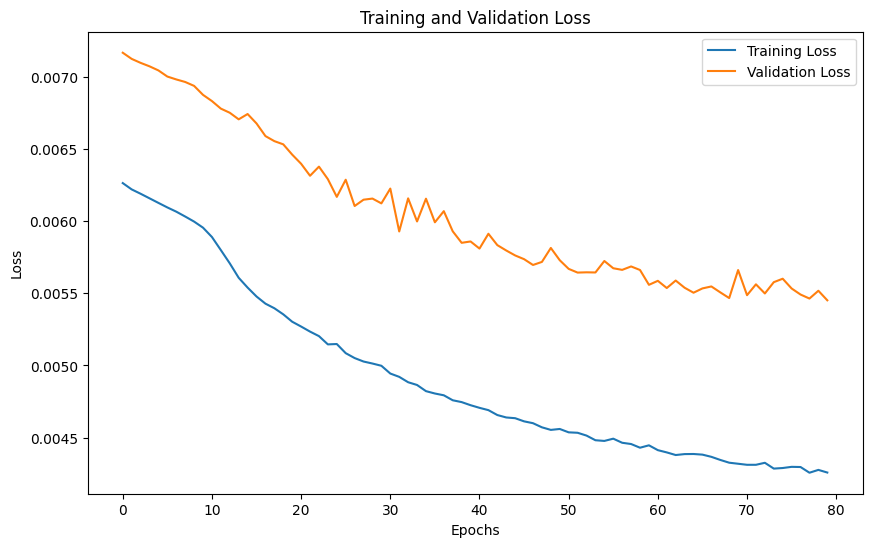

In [ ]:
# Step 7: Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

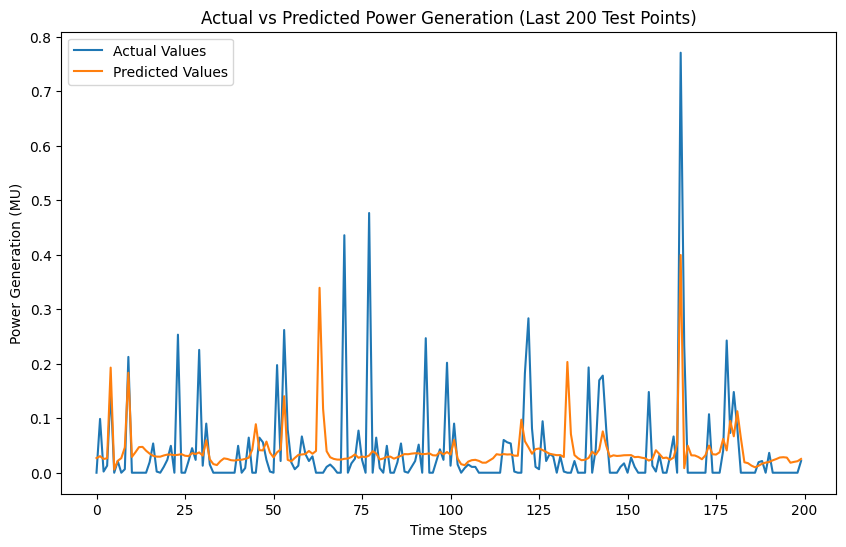

In [ ]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[-200:], label='Actual Values')
plt.plot(y_pred[-200:], label='Predicted Values')
plt.title('Actual vs Predicted Power Generation (Last 200 Test Points)')
plt.xlabel('Time Steps')
plt.ylabel('Power Generation (MU)')
plt.legend()
plt.show()

In [ ]:
#MULTI VARIATE LSTM FOR MAHARASHTRA